In [28]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.tools.visualization import plot_bloch_multivector, plot_histogram

In [33]:
def logicalAnd(circuit,input_qubits,output_qubit):
    circuit.mcx(input_qubits,output_qubit)
    
def logicalOr(circuit,input_qubits,output_qubit):
    for i in input_qubits:
        circuit.x(i)
    circuit.x(output_qubit)
    circuit.mcx(input_qubits,output_qubit)
    for i in input_qubits:
        circuit.x(i)

# circuit = QuantumCircuit(3)
# logicalAnd(circuit,[0,1],2)
# logicalOr(circuit,[0,1],2)

# %matplotlib inline
# circuit.draw('mpl')
    

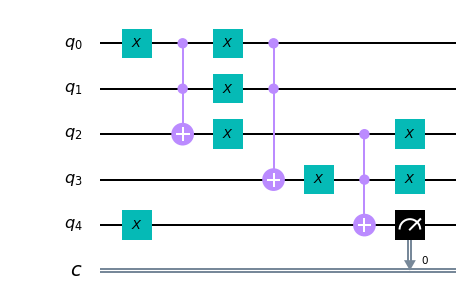

In [66]:
#implementing the function xy + x'y'
circuit = QuantumCircuit(5,1)

#change input by commenting/uncommenting these two lines
circuit.x(0)
# circuit.x(1)
logicalAnd(circuit,[0,1],2)
circuit.x(0)
circuit.x(1)
logicalAnd(circuit,[0,1],3)
logicalOr(circuit,[2,3],4)
circuit.measure(4,0)

%matplotlib inline
circuit.draw(output = 'mpl')

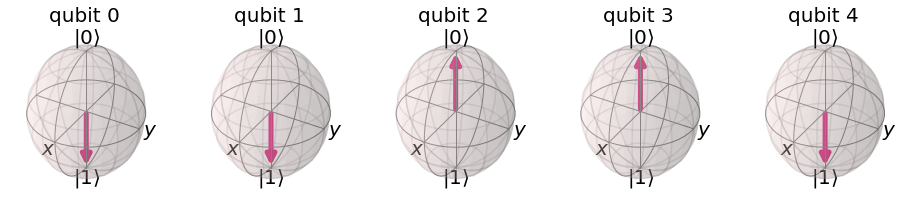

In [19]:
#to run this, remove the classical register and measurement
sv = Statevector.from_label('11000')
nsv = sv.evolve(circuit)
plot_bloch_multivector(nsv.data)


{'1': 100}


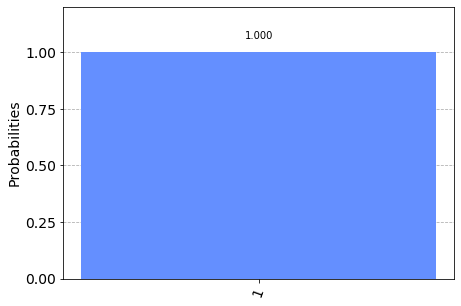

In [37]:
from qiskit import Aer, execute
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, simulator, shots=100).result()
counts = result.get_counts(circuit)
print(counts)
plot_histogram(counts)

In [71]:
#implementation of circuit for finding a boolean function in DNF
#encoding used: x + yz => [[1,0,0],[0,1,1]], xy'z + y'z' => [[1,-1,-1],[0,-1,-1]]

def DNF(minterms):
    n = len(minterms[0])
    m = len(minterms)
    circuit = QuantumCircuit(n+m+1,1)
    o = n
    for t in minterms:
        inp = []
        for i in range(0,n):
            if t[i] == -1:
                circuit.x(i)
                inp.append(i)
            elif t[i] == 1:
                inp.append(i)
        logicalAnd(circuit,inp,o)
        for i in range(0,n):
            if t[i] == -1:
                circuit.x(i)
        o = o+1
    logicalOr(circuit,list(range(n,n+m)),n+m)
    circuit.measure(n+m,0)
    return circuit

circuit = QuantumCircuit(6,1)
#comment/uncomment to modify input
circuit.x(0)
circuit.x(1)
#circuit.x(2)
circuit.append(DNF([[1,0,0],[0,-1,-1]]),[0,1,2,3,4,5],[0]) #f = x + y'z'
circuit.draw(output = 'text')
    

┌───┐┌─────────────┐
q_0: ┤ X ├┤0            ├
     ├───┤│             │
q_1: ┤ X ├┤1            ├
     └───┘│             │
q_2: ─────┤2            ├
          │             │
q_3: ─────┤3 circuit136 ├
          │             │
q_4: ─────┤4            ├
          │             │
q_5: ─────┤5            ├
          │             │
c_0: ═════╡0            ╞
          └─────────────┘

{'1': 100}


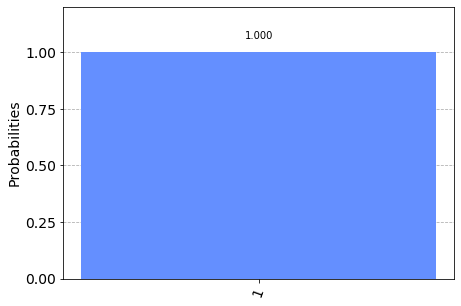

In [61]:
from qiskit import Aer, execute
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, simulator, shots=100).result()
counts = result.get_counts(circuit)
print(counts)
plot_histogram(counts)